<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
# STEP 2: Load the dataset
df = pd.read_csv('/content/Zoo.csv')  # Upload this file via Colab interface
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


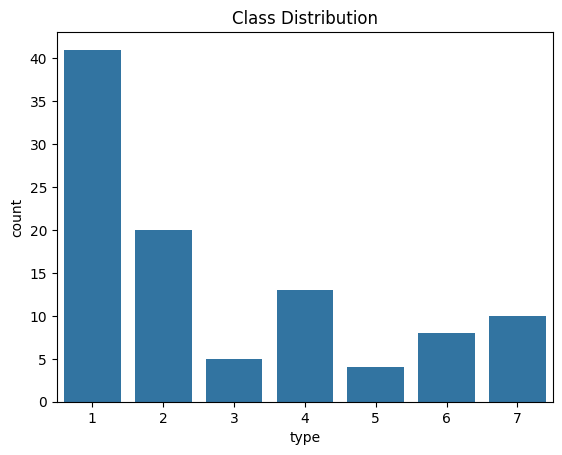

In [ ]:
# STEP 3: Exploratory Data Analysis (EDA)
# 1. Class distribution
sns.countplot(data=df, x='type')
plt.title('Class Distribution')
plt.show()

In [ ]:
X = df_clean.drop(columns='type')
y = df_clean['type']

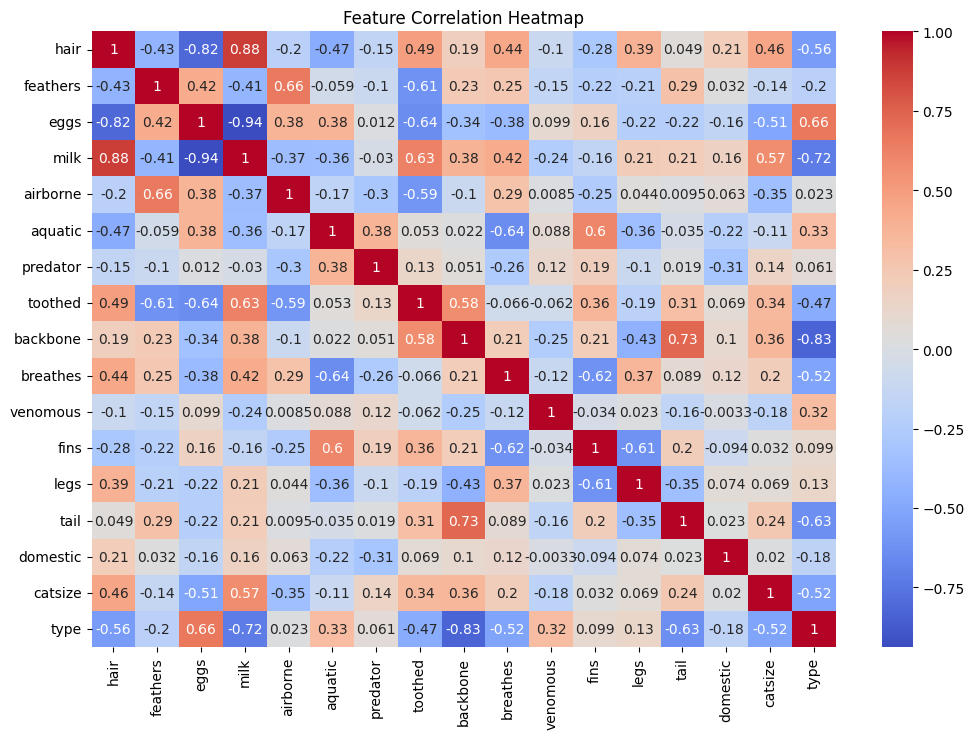

In [ ]:
# Clean DataFrame for numeric operations like correlation
df_corr = df.copy()

# Drop non-numeric columns (like 'animal_name') if they exist
non_numeric_cols = df_corr.select_dtypes(include=['object']).columns
df_corr = df_corr.drop(columns=non_numeric_cols)

# Now compute correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()


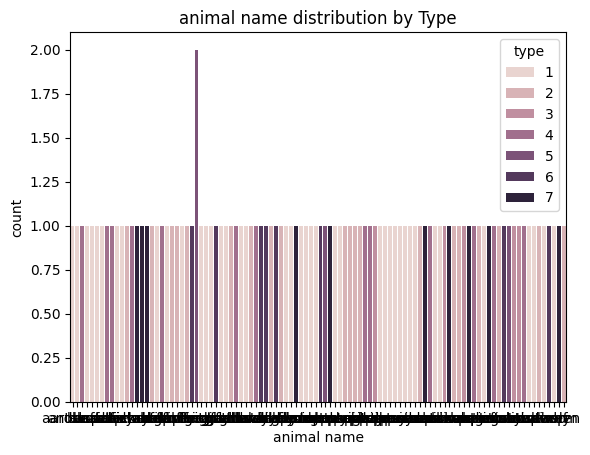

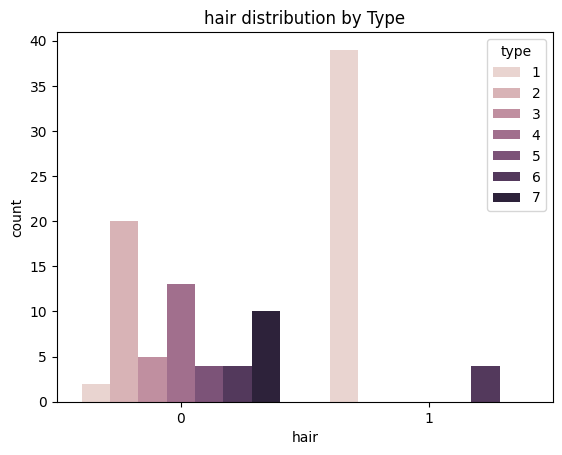

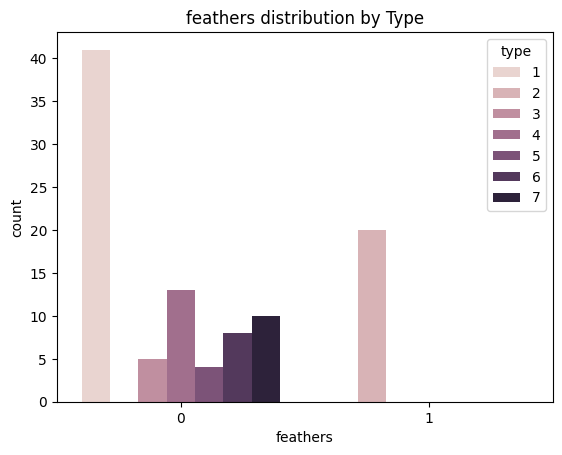

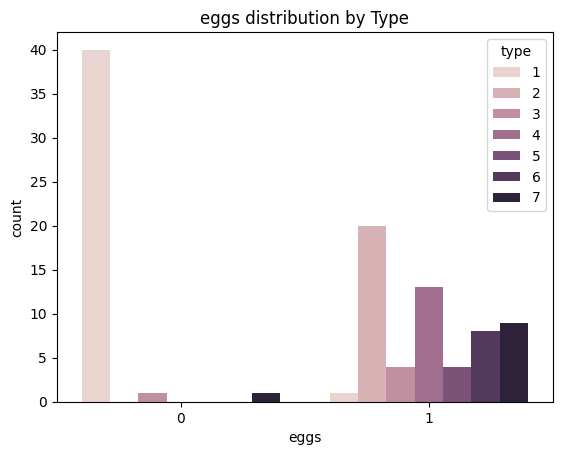

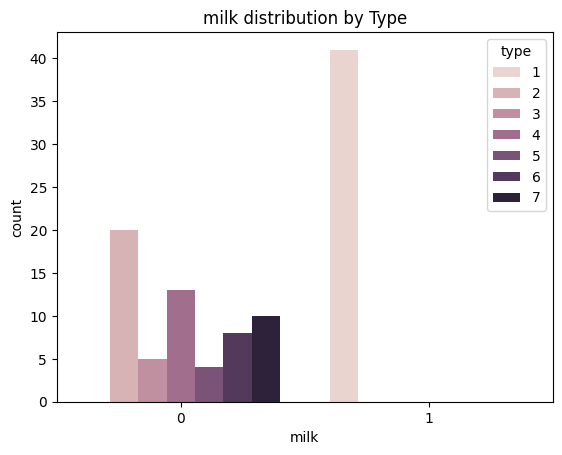

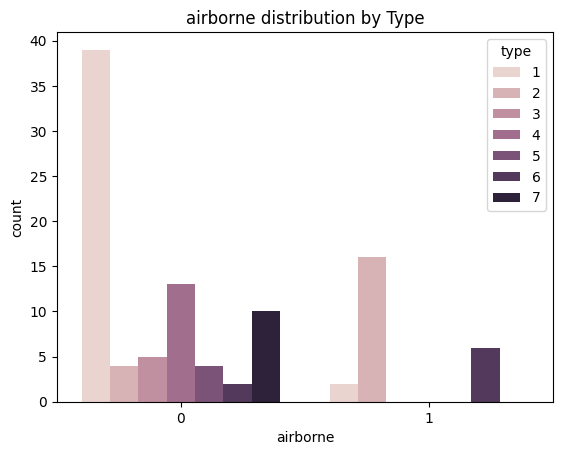

In [ ]:
# 3. Count plots for binary features
# Create a copy of df and safely drop only if the columns exist
binary_features_df = df.copy()
for col in ['animal_name', 'type']:
    if col in binary_features_df.columns:
        binary_features_df = binary_features_df.drop(columns=col)

binary_features = binary_features_df.columns
for col in binary_features[:6]:  # limit for visualization
    sns.countplot(data=df, x=col, hue='type')
    plt.title(f'{col} distribution by Type')
    plt.show()

In [ ]:
# STEP 4: Data Preprocessing
if 'animal_name' in df.columns:
    df = df.drop(columns='animal_name')  # Safely drop only if it exists

X = df.drop(columns='type')
y = df['type']

In [ ]:
# STEP 4: Data Preprocessing
# Ensure 'animal_name' is removed from df before defining X
if 'animal_name' in df.columns:
    df = df.drop(columns='animal_name')

# Define features and target
X = df.drop(columns='type')
y = df['type']

# Remove any remaining non-numeric columns
X = X.select_dtypes(include=np.number) # This line added to remove columns not of numeric type

# Confirm X is numeric
print(X.dtypes)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
dtype: object


In [ ]:
# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# STEP 6: KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# STEP 7: Evaluation
y_pred = knn.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [ ]:
# STEP 8: Visualize Decision Boundary using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42, stratify=y)


In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)


KNeighborsClassifier()

In [ ]:
# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

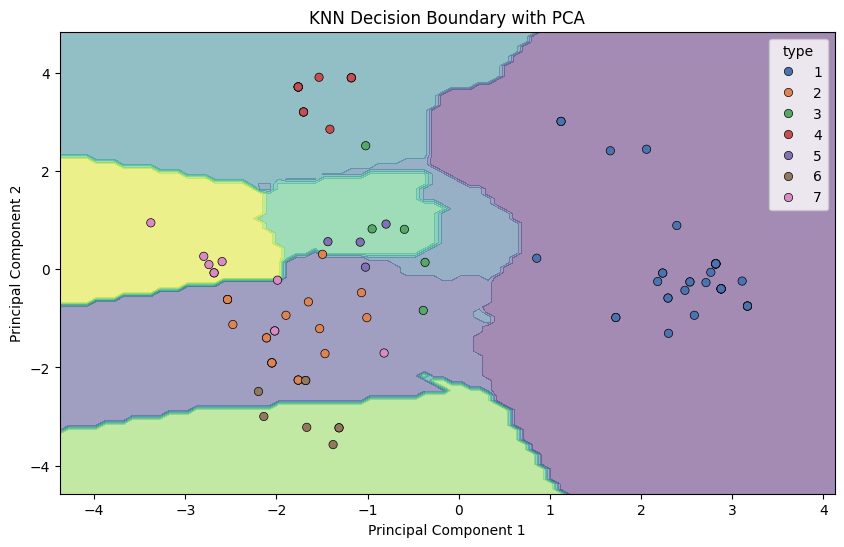

In [ ]:
# Plotting decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='deep', edgecolor='k')
plt.title("KNN Decision Boundary with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**1. What are the key hyperparameters in KNN?**

1. K: The number of nearest neighbors to consider.
2. Distance Metric: The method used to calculate distance between data points.

These hyperparameters significantly impact the model's performance and accuracy.

**2. What distance metrics can be used in KNN?**

1. Euclidean Distance
2. Manhattan Distance
3. Minkowski Distance
4. Cosine Similarity

These metrics help measure the similarity between data points.

